# Retail Chain Sales Exploratory Data Analysis

![Assorted Drinks](./assets/images/kenny-eliason-SvhXD3kPSTY-unsplash.jpg)

Photo by <a href="https://unsplash.com/@neonbrand?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Kenny Eliason</a> on <a href="https://unsplash.com/photos/SvhXD3kPSTY?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  

## 1. Business Understanding

We are embarking on an Exploratory Data Analysis (EDA) journey with a rich supermarket dataset, and our collective focus lies in formulating a comprehensive problem statement. Firstly, we aim to unravel the intricate patterns within sales data, aiming to discern the key factors influencing them. Our group endeavors to identify the top-selling product categories, investigate seasonal variations, and scrutinize the potential correlations between Payment Method and sales performance. Moreover, we're eager to understand if specific days of the week or particular times of day witness increased foot traffic and/or higher sales, as this can greatly inform our decisions regarding staffing and inventory management.

Additionally, we are committed to delving into the intricacies of customer segmentation and behavior analysis. Our objective is to uncover who our most frequent customers are, along with their demographic profiles and preferred product choices. We are also excited to unearth any discernible purchasing patterns among our customers. Such insights will be pivotal in designing targeted marketing strategies and optimizing product placement strategies throughout the store.

Lastly, we are intrigued by the geographical and demographic factors that influence our store's performance. Our collective efforts will focus on analyzing the supermarket's location in relation to residential areas, competitors, and transportation hubs. We are also keen on understanding the income levels and preferences of the local population, as this information will enable us to tailor our product offerings and marketing campaigns to maximize sales and profitability.

In summary, our group is committed to conducting an EDA on this supermarket dataset with the ultimate goal of providing actionable insights. By addressing these various aspects in our analysis, we aim to improve the supermarket's operations, enhance customer satisfaction, and ultimately drive the growth of our business.

## 2. Data Understanding

The dataset is contained in a CSV(comma separated Values) file, and is stored in the data/ folder in the current folder.
It is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.
Our dataset contains 1000 rows and 17 columns giving details about each datapoint.
Data Dictionary

* **Invoice id:** Computer generated sales slip invoice identification number
* **Branch:** Branch of supercenter (3 branches are available identified by A, B and C).
* **City:** Location of supercenters
* **Customer type:** Type of customers, recorded by Members for customers using member card and Normal for without member card.
* **Gender:** Gender type of customer
* **Product line:** General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
* **Unit price:** Price of each product in USD
* **Quantity:** Number of products purchased by customer
* **Tax:** 5% tax fee for customer buying
* **Total:** Total price including tax
* **Date:** Date of purchase (Record available from January 2019 to March 2019)
* **Time:** Purchase time (10am to 9pm)
* **Payment:** Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
* **COGS:** Cost of goods sold
* **Gross margin percentage:** Gross margin percentage
* **Gross income:** Gross income
* **Rating:** Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)


## 3. Data Cleaning

In [35]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# loading data
df = pd.read_csv('./data/supermarket_sales.csv')
pd.set_option('display.max_columns', None)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
# Get a high level overview of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

From our overview, we can see that our date and time columns are of the object datatype. We'll change this to Date datatype to enable Time series analysis on the dataset, and save the result in a new datetime column.

We will also change the name of Payment Column to Payment_Method to reflect the right data contained in the column.
We'll also replace all the spaces in column name with underscores

In [4]:
# Combine 'date' and 'time' into a single datetime column
df['Datetimestamp'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

In [5]:
# Rename 'Payment' to 'Payment_Method'
df.rename(columns={'Payment': 'Payment_Method'}, inplace=True)

In [6]:
# Replace spaces with underscores in column names
df.columns = [col.replace(' ', '_') for col in df.columns]

In [7]:
# check 
df.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment_Method,cogs,gross_margin_percentage,gross_income,Rating,Datetimestamp
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00


In [8]:
# Check our new data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice_ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer_type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product_line             1000 non-null   object        
 6   Unit_price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax_5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   object        
 11  Time                     1000 non-null   object        
 12  Payment_Method           1000 non-n

We will then check for a high level statistical data description of the dataset

In [9]:
# check for data statistical values
df.describe()

,Unit_price,Quantity,Tax_5%,Total,cogs,gross_margin_percentage,gross_income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


## 4. Exploratory Data Analysis

In this section, we will conduct Exploratory Data Analysis (EDA) on the dataset. Our goal is to gain a deeper understanding of the data's properties and use these insights to inform decision-making.

### 4.1 What is the overall sales trend over the three-month period?
One of the key questions we aim to answer in our EDA is: **What is the overall sales trend over the three-month period?** Understanding the sales trend is vital for a variety of reasons. It provides insights into the financial performance of the business, helps in forecasting future sales, and aids in making informed decisions related to inventory management, marketing strategies, and resource allocation.

**Daily sales trends:**

In [31]:
# create a copy of the df dataset
timeseries_df = df.copy()

# Create a daily sales dataframe by adding up the number of times each date appears
daily_sales = timeseries_df['Date'].value_counts().reset_index()

# The columns for daily_sales are 'Date' and 'Sales Count'
daily_sales.columns = ['Date', 'Sales Count']

# Create a new column for the day of week
daily_sales['Day of Week'] = pd.to_datetime(daily_sales['Date']).dt.day_name()

# Validate the dataframe
daily_sales.head()

,Date,Sales Count,Day of Week
0,2/7/2019,20,Thursday
1,2/15/2019,19,Friday
2,3/14/2019,18,Thursday
3,3/2/2019,18,Saturday
4,1/8/2019,18,Tuesday


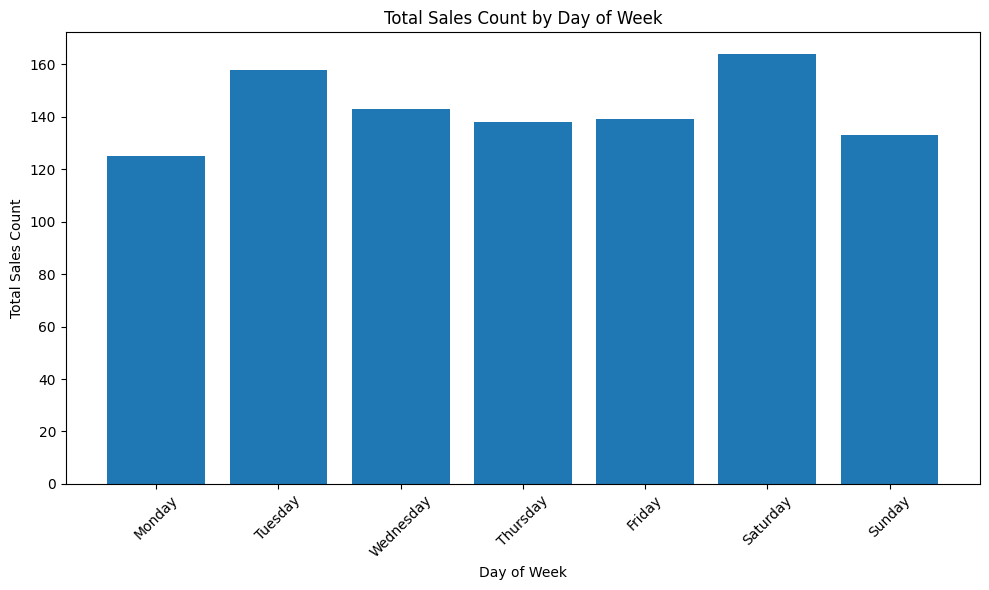

In [33]:
# Group the data by day of week
daily_sales_grouped = daily_sales.groupby('Day of Week')['Sales Count'].sum()
# Define the order of days of the week for sorting
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Sort the data based on the defined order
daily_sales_grouped = daily_sales_grouped.reindex(day_order)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(daily_sales_grouped.index, daily_sales_grouped.values)
plt.xlabel('Day of Week')
plt.ylabel('Total Sales Count')
plt.title('Total Sales Count by Day of Week')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

**Weekly sales trends**

In [34]:
# Convert the 'Date' column to a datetime object if it's not already
daily_sales['Date'] = pd.to_datetime(daily_sales['Date'])

# Set the 'Date' column as the DataFrame index
daily_sales.set_index('Date', inplace=True)

# Resample the data to get weekly sales
weekly_sales = daily_sales.resample('W').sum()

# Reset the index to have the 'Date' as a regular column
weekly_sales.reset_index(inplace=True)

# Validate the dataframe, there should be 12 weeks of data
weekly_sales

C:\Users\kgots\AppData\Local\Temp\ipykernel_3360\4016161912.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_sales = daily_sales.resample('W').sum()


,Date,Sales Count
0,2019-01-06,55
1,2019-01-13,73
2,2019-01-20,82
3,2019-01-27,93
4,2019-02-03,83
5,2019-02-10,92
6,2019-02-17,72
7,2019-02-24,60
8,2019-03-03,87
9,2019-03-10,88


In [36]:
# Create a line graph using Plotly Express
fig = px.line(weekly_sales, x='Date', y='Sales Count', title='Weekly Sales')
fig.update_traces(mode='lines+markers', hovertemplate='%{y}')

# Customize hover text
fig.update_layout(hovermode='x unified', hoverlabel=dict(bgcolor='white', font_size=14))

# Show the interactive plot
fig.show()

**Monthly sales trend**

In [45]:
# Resample the data to get monthly sales
monthly_sales = daily_sales.resample('M').sum()

# Reset the index to have the 'Date' as a regular column
monthly_sales.reset_index(inplace=True)

# Format the 'Date' column to show the name of the month
monthly_sales['Month'] = monthly_sales['Date'].dt.strftime('%B')

# Drop the original 'Date' column
monthly_sales.drop(columns=['Date'], inplace=True)

monthly_sales

C:\Users\kgots\AppData\Local\Temp\ipykernel_3360\754364026.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Sales Count,Month
0,352,January
1,303,February
2,345,March


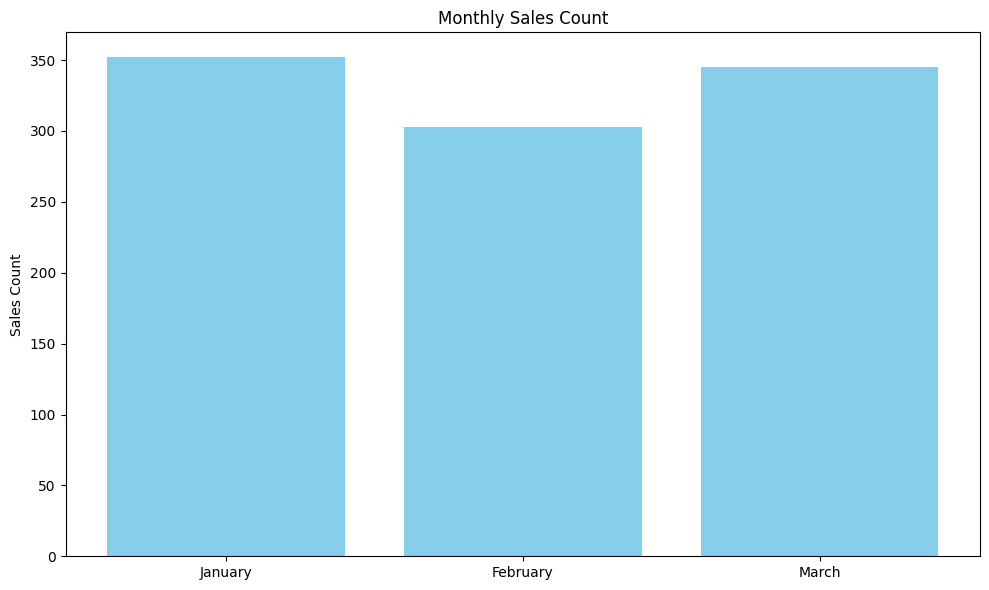

In [48]:
# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales['Month'], monthly_sales['Sales Count'], color='skyblue')
plt.ylabel('Sales Count')
plt.title('Monthly Sales Count')
plt.tight_layout()

# Show the bar graph
plt.show()

### 4.2 Which branch has the highest and lowest sales?

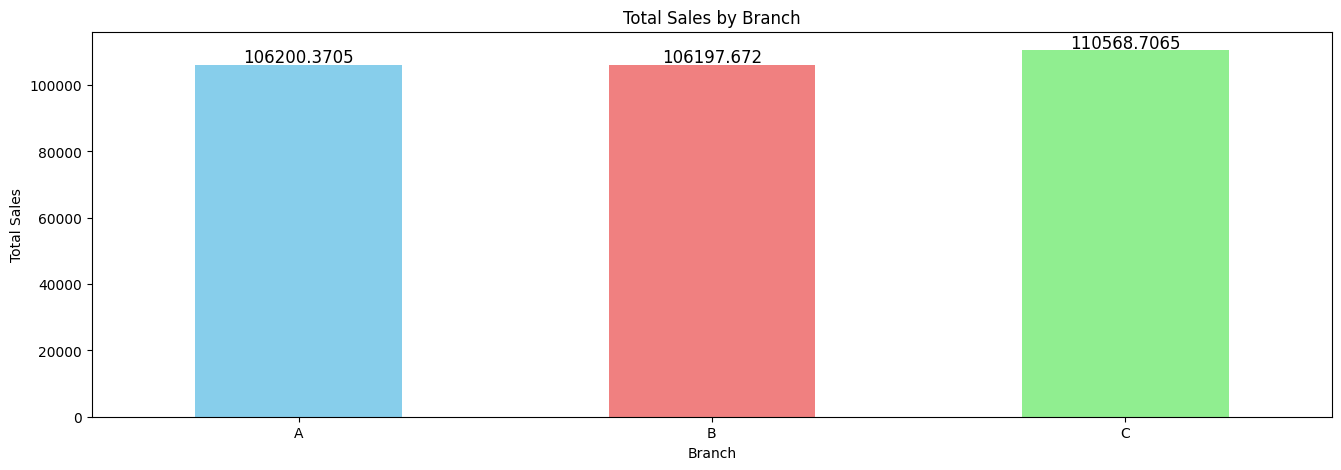

In [11]:
# Calculate total sales for each branch
branch_sales = df.groupby('Branch')['Total'].sum()

# Visualize branch performance with numbers on top of the bars
plt.figure(figsize=(16, 5))
ax = branch_sales.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Total Sales by Branch')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)

# Add numbers on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

### 4.4 What is the distribution of product categories in terms of sales?

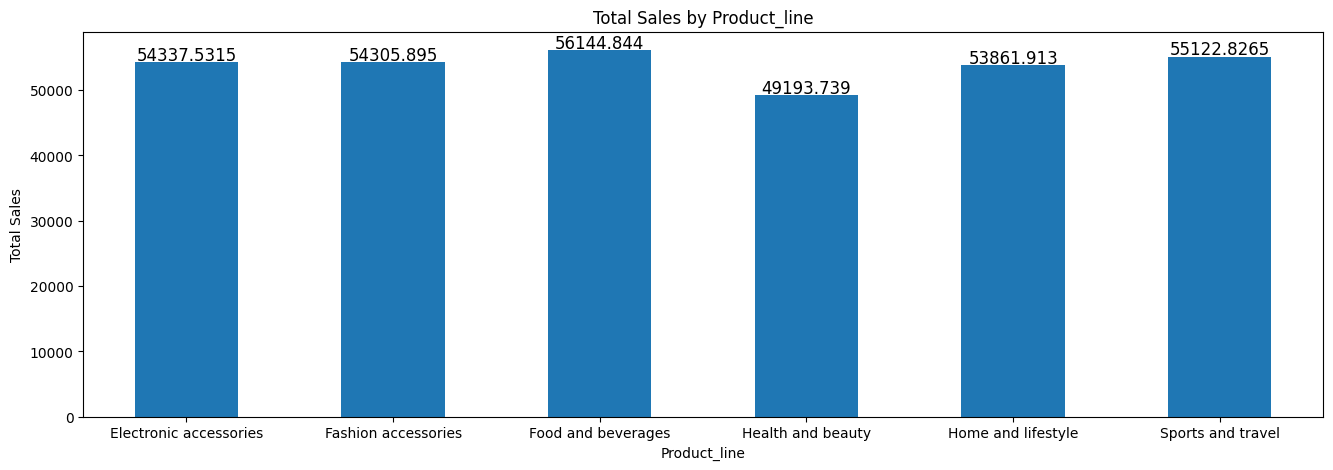

In [12]:
# Calculate total sales for each branch
branch_sales = df.groupby('Product_line')['Total'].sum()

# Visualize branch performance
plt.figure(figsize=(16, 5))
ax = branch_sales.plot(kind='bar')
plt.title('Total Sales by Product_line')
plt.xlabel('Product_line')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)

# Add numbers on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

### 4.5 Is there a significant difference in sales between members and non-members?

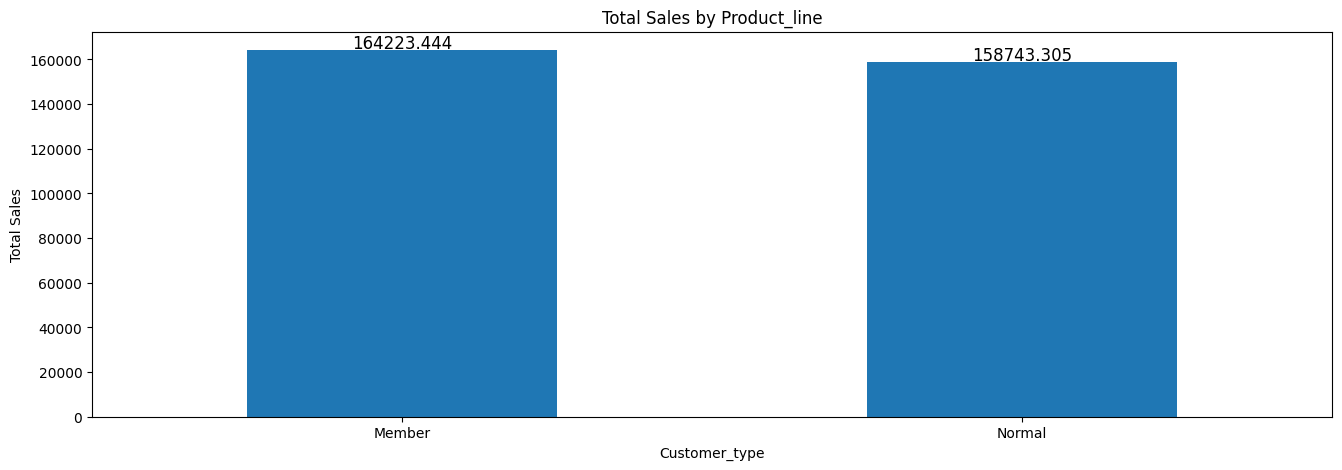

In [13]:
# Calculate total sales for each branch
branch_sales = df.groupby('Customer_type')['Total'].sum()

# Visualize branch performance
plt.figure(figsize=(16, 5))
ax = branch_sales.plot(kind='bar')
plt.title('Total Sales by Product_line')
plt.xlabel('Customer_type')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)

# Add numbers on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

### 4.6 How does gender impact purchasing behavior?

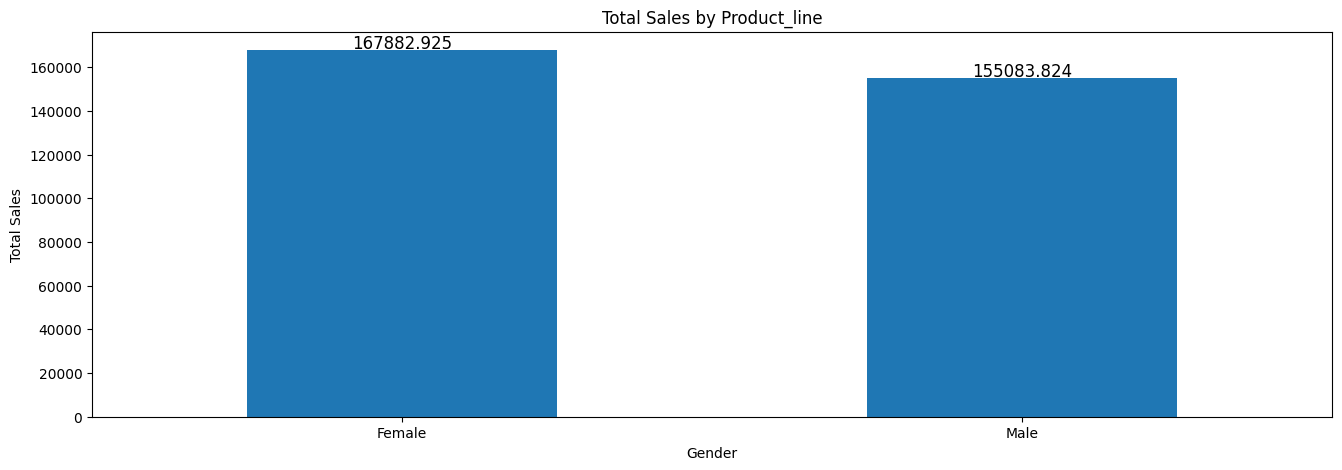

In [14]:
# Calculate total sales for each branch
branch_sales = df.groupby('Gender')['Total'].sum()

# Visualize branch performance
plt.figure(figsize=(16, 5))
ax = branch_sales.plot(kind='bar')
plt.title('Total Sales by Product_line')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)

# Add numbers on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()


Plot the total sales over time to visualize any trends or seasonality.
How do sales vary on different days of the week?
Analyze whether there are specific days that consistently have higher or lower sales.

Which branch has the highest and lowest sales?
Calculate and compare the total sales for each branch.

What is the distribution of product categories in terms of sales?
Explore the sales distribution across different product lines.

Is there a significant difference in sales between members and non-members?
Analyze the total sales and average sales per customer type.

How does gender impact purchasing behavior?
Investigate whether there are gender-based differences in product preferences or spending.
How gender affects the payment method,total amount spend, and which gender makes the biggest customer base. 

What are the most and least popular payment methods?
Determine the frequency of each payment method used by customers.

Are there any noticeable patterns in customer ratings?
Analyze the distribution of customer ratings and look for trends over time.

Do certain product categories have higher profit margins?
Calculate and compare the gross margin percentages for different product lines.

Is there a correlation between the time of day and sales volume?
Investigate whether sales vary significantly during different times of the day.

Are there any outliers in the data, such as unusually high or low sales transactions?
Identify and investigate any outliers in sales or other numerical columns.

Is there a relationship between customer ratings and total spending?
Examine whether customers who spend more tend to give higher ratings.

What is the average gross income for each branch?
Calculate and compare the average gross income generated by each branch.



In [ ]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

What is the overall sales trend over the three-month period?
Plot the total sales over time to visualize any trends or seasonality.

Which branch has the highest and lowest sales?
Calculate and compare the total sales for each branch.

What is the distribution of product categories in terms of sales?
Explore the sales distribution across different product lines.

Is there a significant difference in sales between members and non-members?
Analyze the total sales and average sales per customer type.

How does gender impact purchasing behavior?
Investigate whether there are gender-based differences in product preferences or spending.
How gender affects the payment method,total amount spend, and which gender makes the biggest customer base. 

What are the most and least popular payment methods?
Determine the frequency of each payment method used by customers.

Are there any noticeable patterns in customer ratings?
Analyze the distribution of customer ratings and look for trends over time.

Do certain product categories have higher profit margins?
Calculate and compare the gross margin percentages for different product lines.

Is there a correlation between the time of day and sales volume?
Investigate whether sales vary significantly during different times of the day.

How do sales vary on different days of the week?
Analyze whether there are specific days that consistently have higher or lower sales.

Are there any outliers in the data, such as unusually high or low sales transactions?
Identify and investigate any outliers in sales or other numerical columns.

Is there a relationship between customer ratings and total spending?
Examine whether customers who spend more tend to give higher ratings.

What is the average gross income for each branch?
Calculate and compare the average gross income generated by each branch.

Feedback

Conclusion